# Case Study: Fashion Class Classfication

<img src="https://github.com/josefftan/josefftan.github.io/blob/master/assets/img/portfolio/fashion.png?raw=true" alt="Girl in a jacket" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Fashion-Class-Classfication" data-toc-modified-id="Case-Study:-Fashion-Class-Classfication-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Fashion Class Classfication</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

The global fashion industry is valued at three trillion dollars and accounts for 2 percent of the world's the global fashion industry is valued at three trillion dollars and accounts for 2 percent of the world's machine learning and deep learning.

In this case study, the objective is to build a kind of model or artificial intelligence based on deep learning model that can classify images to different categories or different classes.


**Problem:**
 - Classify the fashion items according its classes

**Dataset:**
 - Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

 - Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

The 10 classes are as follows:  
 - 0 => T-shirt/top
 - 1 => Trouser
 - 2 => Pullover
 - 3 => Dress
 - 4 => Coat
 - 5 => Sandal
 - 6 => Shirt
 - 7 => Sneaker
 - 8 => Bag
 - 9 => Ankle boot
 
**Sources:**
 - Zalando's article images

# Libraries and Data Importation

In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Import data
fashion_train_df = pd.read_csv('project_data/fashion_train.csv')
fashion_test_df = pd.read_csv('project_data/fashion_test.csv')

# Data Exploration

In [62]:
# The train image is already flatten
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# The test image is already flatten
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Check the dataset shape
fashion_train_df.shape, fashion_test_df.shape

((60000, 785), (10000, 785))

In [65]:
# transform dataset into arrays
training = np.array(fashion_train_df, dtype = 'float')
testing = np.array(fashion_test_df, dtype = 'float')

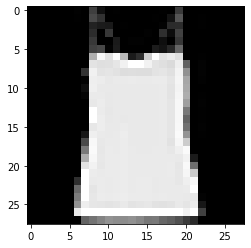

The class is 0.0


In [66]:
# View some images
import random

# select any random index from 1 to 60,000
i = random.randint(1,60000)

# reshape and plot the image
plt.imshow( training[i,1:].reshape((28,28)) )

# reshape and plot the image
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray')
plt.show()

# Check the label of the image
label = training[i,0]
print('The class is', label)

# 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

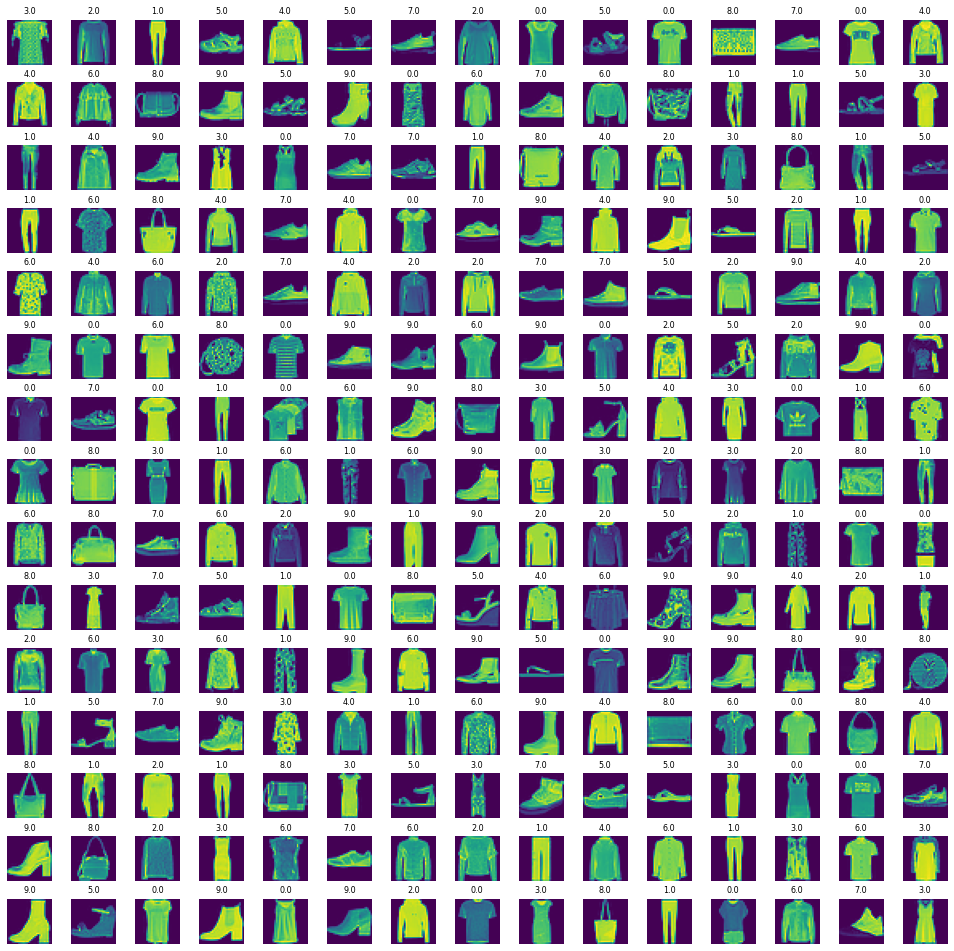

In [67]:
# View more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4) 

# Data Preparation

In [68]:
# Normalize the training dataset
X_train = training[:, 1:] / 255
y_train = training[:, 0]

In [69]:
# Normalize the training dataset
X_test = testing[:, 1:] / 255
y_test = testing[:, 0]

In [70]:
# Split the model
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 100)

In [71]:
# Check the dataset dimension
X_train.shape,y_train.shape

((48000, 784), (48000,))

In [72]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [73]:
# Check the dataset dimension
X_train.shape, X_validate.shape , y_train.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,))

# Model Training

In [74]:
# Import libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [80]:
# Build model
cnn_model = Sequential()

# First Layer
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

# Down sampling
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

# Flattening
cnn_model.add(Flatten())

# Connecting layer
cnn_model.add(Dense(units = 32, activation = 'relu'))

# Connecting layer to output
cnn_model.add(Dense(units = 32, activation = 'softmax'))

In [81]:
# Compile the model
cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

In [82]:
# Fit the model with the dataset
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = 50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 6s 64ms/step - loss: 1.7946 - accuracy: 0.4754 - val_loss: 0.8800 - val_accuracy: 0.6874
Epoch 2/50
94/94 [==============================] - 5s 48ms/step - loss: 0.7665 - accuracy: 0.7284 - val_loss: 0.6912 - val_accuracy: 0.7484
Epoch 3/50
94/94 [==============================] - 5s 48ms/step - loss: 0.6544 - accuracy: 0.7626 - val_loss: 0.6227 - val_accuracy: 0.7727
Epoch 4/50
94/94 [==============================] - 5s 52ms/step - loss: 0.5997 - accuracy: 0.7828 - val_loss: 0.5781 - val_accuracy: 0.7928
Epoch 5/50
94/94 [==============================] - 4s 46ms/step - loss: 0.5644 - accuracy: 0.7961 - val_loss: 0.5643 - val_accuracy: 0.7926
Epoch 6/50
94/94 [==============================] - 5s 48ms/step - loss: 0.5403 - accuracy: 0.8040 - val_loss: 0.5301 - val_accuracy: 0.8047
Epoch 7/50
94/94 [==============================] - 5s 53ms/step - loss: 0.5192 - accuracy: 0.8118 - val_loss: 0.5161 - val_accuracy: 0.8117
Epoch 8/50
94

# Model Evaluation

In [83]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8706
Test Accuracy: 0.871


In [84]:
# Get the predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

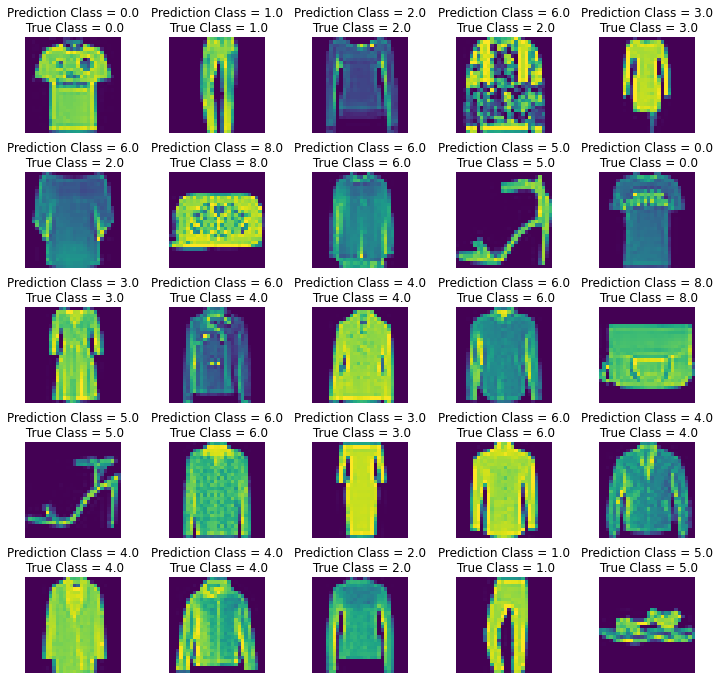

In [85]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # Multiplyting the matrices

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

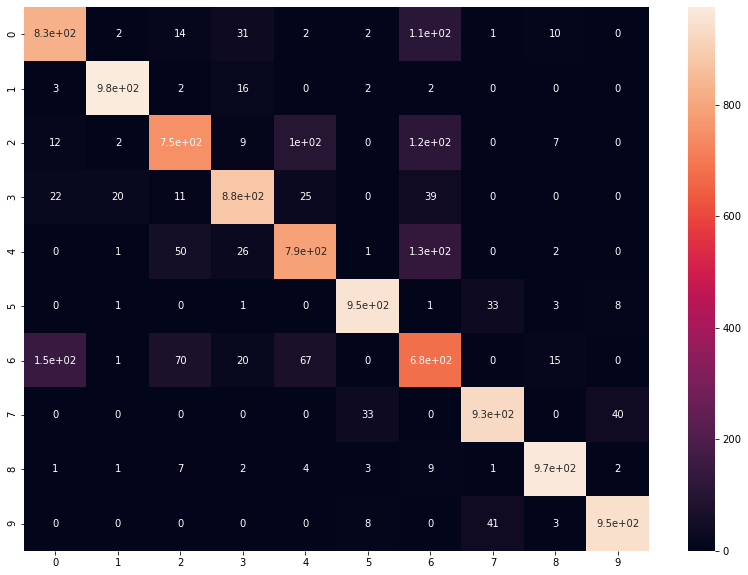

In [87]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
plt.show()

In [88]:
# Create classification report
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.83      0.82      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.83      0.75      0.79      1000
     Class 3       0.89      0.88      0.89      1000
     Class 4       0.80      0.79      0.79      1000
     Class 5       0.95      0.95      0.95      1000
     Class 6       0.63      0.68      0.65      1000
     Class 7       0.92      0.93      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Conclusion

The model were able to achieved 87% accuracy. Some classes can be easily predicted especially Trouser, Bag, Sandal and Ankle Boots. The class of shirt was difficult to predict by the machine probably due to its similarity of shape with coat and pull over. With that, it confuses the machine and decrease its accuracy. This can be further by uploading better texture of the images and tuning the parameters of the model. 